___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option("display.float_format", lambda x: "%.3f" % x)


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [4]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [5]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [6]:
X_train[5].shape

(28, 28)

In [7]:
y_train[9]

5

In [8]:
classes[y_train[9]]

'Sandal'

'Sandal'

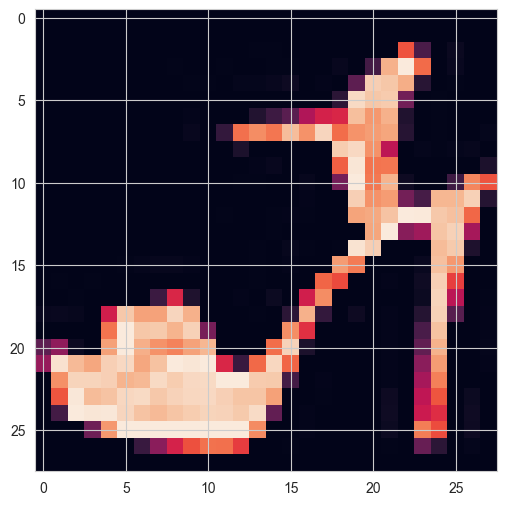

In [9]:
plt.imshow(X_train[9])
classes[y_train[9]]

'Ankle boot'

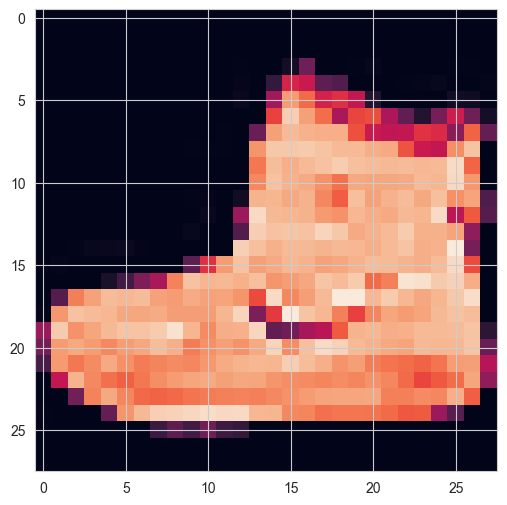

In [10]:
plt.imshow(X_train[0])
classes[y_train[0]]

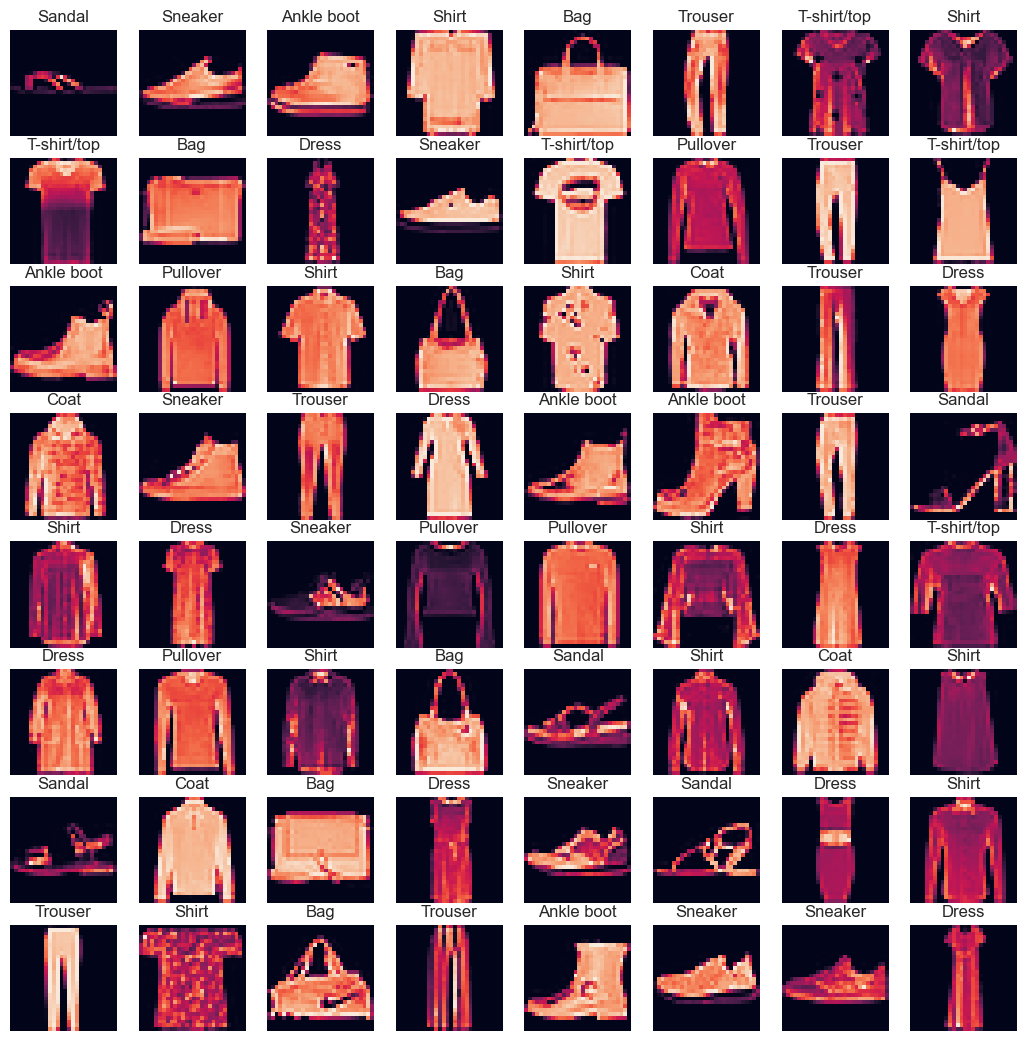

In [11]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(X_train[rand_index])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [12]:
X_train[5].min()

0

In [13]:
X_train[5].max()

255

In [14]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [15]:
X_train[5].min()

0.0

In [16]:
X_train[5].max()

1.0

'Pullover'

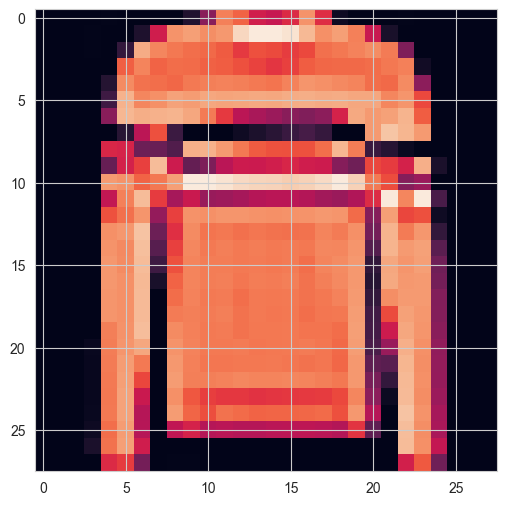

In [17]:
plt.imshow(X_train[5])
classes[y_train[5]]

In [18]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [19]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [20]:
np.expand_dims(X_train, 3).shape

(60000, 28, 28, 1)

In [21]:
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [23]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [27]:
y_train[9]

5

In [28]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [30]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu"))

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
______________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop= EarlyStopping(monitor="val_accuracy", mode="max", patience=4, restore_best_weights=True )

In [36]:
model.fit(X_train, Y_train, batch_size=32, epochs=15, validation_data=(X_test, Y_test), callbacks=[early_stop])

Epoch 1/15
   4/1875 [..............................] - ETA: 1:31 - loss: 0.0764 - accuracy: 0.9766

1875/1875 [==============================] - 96s 51ms/step - loss: 0.0946 - accuracy: 0.9669 - val_loss: 0.3213 - val_accuracy: 0.9145
Epoch 2/15
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0845 - accuracy: 0.9709 - val_loss: 0.3453 - val_accuracy: 0.9124
Epoch 3/15
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0737 - accuracy: 0.9742 - val_loss: 0.3625 - val_accuracy: 0.9177
Epoch 4/15
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0657 - accuracy: 0.9769 - val_loss: 0.4246 - val_accuracy: 0.9116
Epoch 5/15
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0581 - accuracy: 0.9802 - val_loss: 0.4363 - val_accuracy: 0.9041
Epoch 6/15
1875/1875 [==============================] - 87s 46ms/step - loss: 0.0530 - accuracy: 0.9822 - val_loss: 0.4750 - val_accuracy: 0.9130
Epoch 7/15
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0480 - accuracy: 0.9830 - val_loss: 0.4874 - val_accura

**TASK 7: Plot values of metrics you used in your model.**

<Axes: >

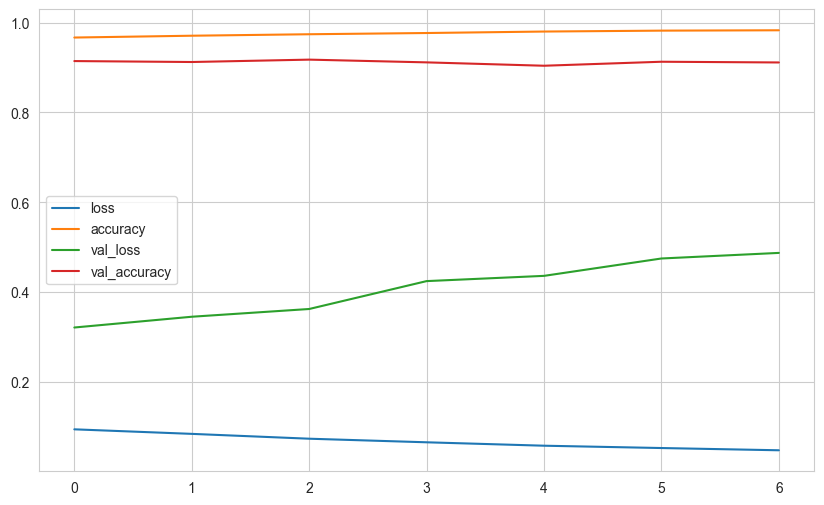

In [41]:
result = pd.DataFrame(model.history.history)
result.plot()

<Axes: >

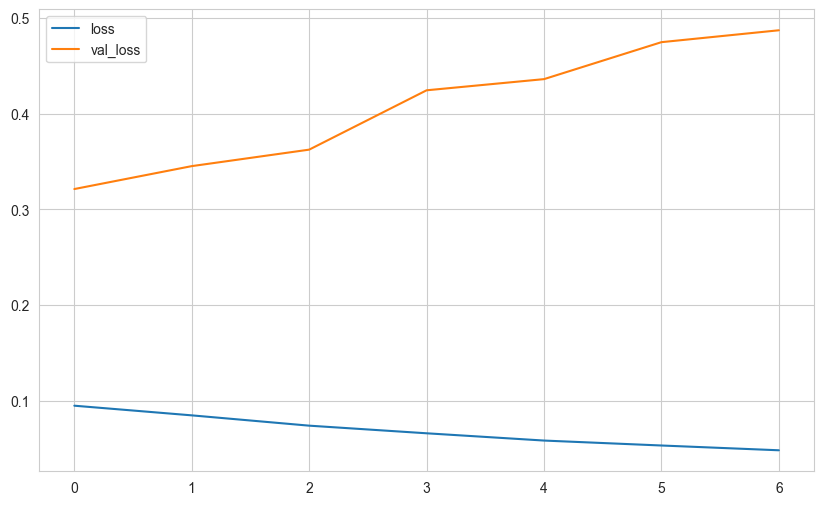

In [43]:
result[["loss", "val_loss"]].plot()

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

In [48]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.3625 - accuracy: 0.9177


[0.36251020431518555, 0.9176999926567078]

In [50]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", scores[0])
print("Test accuracy:", scores[1])

Test loss: 0.36251020431518555
Test accuracy: 0.9176999926567078


In [51]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 3s 9ms/step


array([[2.52339252e-12, 1.61149381e-16, 1.53925950e-12, ...,
        3.05506205e-06, 4.25533442e-13, 9.99996901e-01],
       [4.43797533e-11, 9.08349511e-30, 1.00000000e+00, ...,
        4.67649140e-17, 2.48461650e-22, 1.20830424e-20],
       [3.27496121e-11, 1.00000000e+00, 1.67007700e-17, ...,
        3.11426592e-16, 1.58732079e-15, 2.27921055e-16],
       ...,
       [2.54257267e-18, 3.42237073e-26, 3.63588130e-15, ...,
        1.60907937e-15, 1.00000000e+00, 1.01537041e-18],
       [3.33482631e-14, 1.00000000e+00, 6.45421011e-19, ...,
        1.21295250e-16, 1.83221974e-18, 5.88430559e-16],
       [4.61611162e-05, 4.47130731e-07, 1.71711633e-06, ...,
        1.33944243e-01, 2.12155719e-04, 5.83227444e-03]], dtype=float32)

In [52]:
pred_prob.shape

(10000, 10)

In [53]:
pred_prob[0]

array([2.5233925e-12, 1.6114938e-16, 1.5392595e-12, 4.3661206e-13,
       9.2442533e-14, 2.3882182e-10, 5.6276232e-14, 3.0550621e-06,
       4.2553344e-13, 9.9999690e-01], dtype=float32)

In [54]:
np.argmax(pred_prob[0])

9

In [55]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [56]:
y_pred.shape

(10000,)

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.89      0.83      0.86      1000
           3       0.91      0.94      0.92      1000
           4       0.85      0.89      0.87      1000
           5       0.99      0.97      0.98      1000
           6       0.80      0.76      0.78      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [58]:
print(confusion_matrix(y_test, y_pred))

[[894   0  10  17   6   1  65   0   7   0]
 [  1 978   2  12   4   0   2   0   1   0]
 [ 26   0 831   8  76   0  59   0   0   0]
 [ 15   4   6 941  11   1  19   0   3   0]
 [  1   1  38  29 894   0  35   0   2   0]
 [  1   0   0   0   1 971   0  15   1  11]
 [114   0  41  25  60   0 757   0   3   0]
 [  0   0   0   0   0   4   0 981   0  15]
 [  6   1   1   6   1   1   8   3 973   0]
 [  0   0   0   0   0   4   0  38   1 957]]


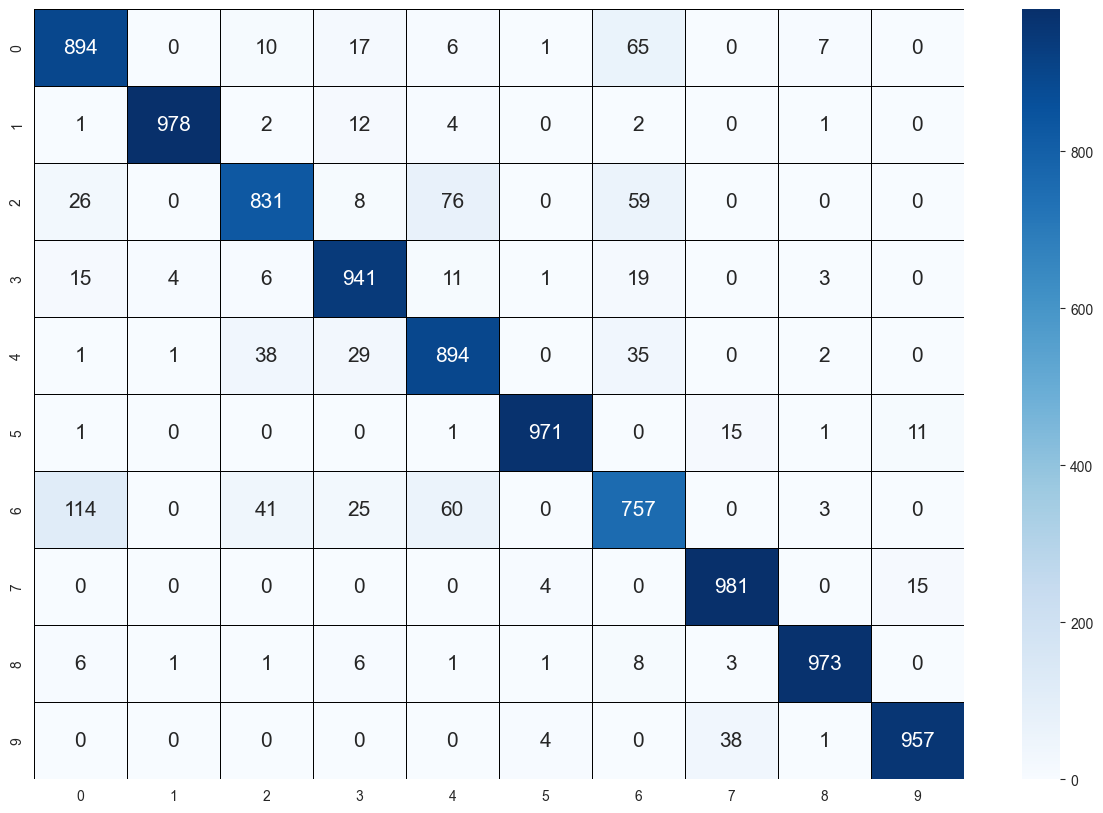

In [59]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [60]:
np.equal(y_test, y_pred).sum()

9177

In [61]:
np.not_equal(y_test, y_pred).sum()

823

## Prediction

In [62]:
my_number = X_test[3]

In [63]:
my_number.shape

(28, 28, 1)

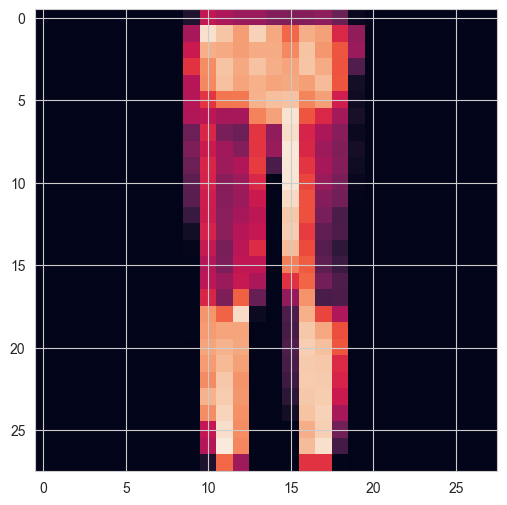

In [64]:
plt.imshow(my_number)

In [65]:
np.expand_dims(my_number, 0).shape

(1, 28, 28, 1)

In [66]:
pred_prob = model.predict(np.expand_dims(my_number, 0))
pred_prob

1/1 [==============================] - 0s 193ms/step


array([[1.3165562e-10, 1.0000000e+00, 6.5909645e-16, 2.7728674e-08,
        3.9991992e-13, 4.7088229e-16, 7.4447341e-12, 2.3258836e-13,
        1.4818962e-14, 1.5350700e-14]], dtype=float32)

In [67]:
y_pred = np.argmax(pred_prob)
y_pred

1

In [76]:
# The model predicted correctly
print(y_test[3])
classes[y_test[3]]

1


'Trouser'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___